# SC1015 DSAI Mini Project
# Part 2: Exploratory Data Analysis


Question: Are we able to estimate an individual's obesity levels based on their diet, lifestyle, and physical condition?

Table of Contents:
1. Collecting and cleaning the data from the provided CSV file.
2. Checking for missing values.
3. Separating numerical and categorical variables into two different DataFrames.
4. Saving the two DataFrames as separate CSV files for further analysis.
5. Visualizing the distribution of each variable using histograms and box plots to check for skewness and outliers.
6. Computing descriptive statistics such as mean, median, standard deviation, and correlation coefficients to quantify the relationship between variables.
7. Conducting a univariate analysis of each variable to explore the distribution and identify any outliers or extreme values. This can be done using histograms, box plots, and summary statistics.
8. Exploring the relationship between the independent variables (diet, lifestyle, and physical condition) and the dependent variable (obesity level) using bivariate analysis techniques such as scatter plots, correlation coefficients, and hypothesis testing.

In [206]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [207]:

df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [187]:
# Check the shape of the dataset
print('Shape of the dataset:', df.shape)

Shape of the dataset: (2111, 17)


In [188]:

# Check the data types of the columns
print('Data types of columns:\n', df.dtypes)

Data types of columns:
 Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object


In [189]:

# Check summary statistics of numeric columns
print('Summary statistics of numeric columns:\n', df.describe())

Summary statistics of numeric columns:
                Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2

In [190]:
# Check the number of unique values in categorical columns
print('Number of unique values in categorical columns:')
for col in df.select_dtypes(include='object').columns:
    print(col, ':', df[col].nunique())

Number of unique values in categorical columns:
Gender : 2
family_history_with_overweight : 2
FAVC : 2
CAEC : 4
SMOKE : 2
SCC : 2
CALC : 4
MTRANS : 5
NObeyesdad : 7


# Step 1: Collecting and cleaning of the data

In [191]:
# Rename the columns to make them more descriptive
diet_df = diet_df.rename(columns={
    'FAVC': 'Frequent consumption of high caloric food',
    'FCVC': 'Frequency of consumption of vegetables',
    'NCP': 'Number of main meals',
    'CAEC': 'Consumption of food between meals',
    'CH2O': 'Consumption of water daily',
    'CALC': 'Consumption of alcohol',
    'NObeyesdad': 'Obesity level'
})

# Map the obesity level codes to descriptive strings
obesity_mapping = {
    'Insufficient_Weight': 'Insufficient Weight',
    'Normal_Weight': 'Normal Weight',
    'Overweight_Level_I': 'Overweight Level I',
    'Overweight_Level_II': 'Overweight Level II',
    'Obesity_Type_I': 'Obesity Type I',
    'Obesity_Type_II': 'Obesity Type II',
    'Obesity_Type_III': 'Obesity Type III'
}

diet_df['Obesity level'] = diet_df['Obesity level'].map(obesity_mapping)

# Step 2: Check for NA or missing values

In [192]:
print(diet_df.isna().sum())

Frequency of consumption of vegetables          0
Number of main meals                            0
Consumption of water daily                      0
Frequent consumption of high caloric food       0
Consumption of food between meals               0
Consumption of alcohol                          0
Obesity level                                2111
dtype: int64


This step checks if there are any missing values in the dataset.
Since there are no missing values in the dataset, this step shows that the dataset is complete and does not require imputation.

# Step 3: Separate numerical and categorical variables into 2 different data frames

In [193]:
# Separate the categorical and numerical columns into two data frames
categorical_cols = ['Frequent consumption of high caloric food', 'Consumption of food between meals', 'Consumption of alcohol', 'Obesity level']
categorical_df = diet_df[categorical_cols]

numerical_cols = ['Frequency of consumption of vegetables', 'Number of main meals', 'Consumption of water daily']
numerical_df = diet_df[numerical_cols]


# Step 4: Upload as different csv files to ease the analysis

In [194]:
# Save the two data frames to CSV files
categorical_df.to_csv('categorical_data.csv', index=False)
numerical_df.to_csv('numerical_data.csv', index=False)

# Step 5: Visualize the distribution of each variable to check for skewness and outliers

In [195]:
# Compute descriptive statistics to quantify the relationship between variables
print(numerical_df.describe())
print(numerical_df.corr())

       Frequency of consumption of vegetables  Number of main meals  \
count                             2111.000000           2111.000000   
mean                                 2.419043              2.685628   
std                                  0.533927              0.778039   
min                                  1.000000              1.000000   
25%                                  2.000000              2.658738   
50%                                  2.385502              3.000000   
75%                                  3.000000              3.000000   
max                                  3.000000              4.000000   

       Consumption of water daily  
count                 2111.000000  
mean                     2.008011  
std                      0.612953  
min                      1.000000  
25%                      1.584812  
50%                      2.000000  
75%                      2.477420  
max                      3.000000  
                                    

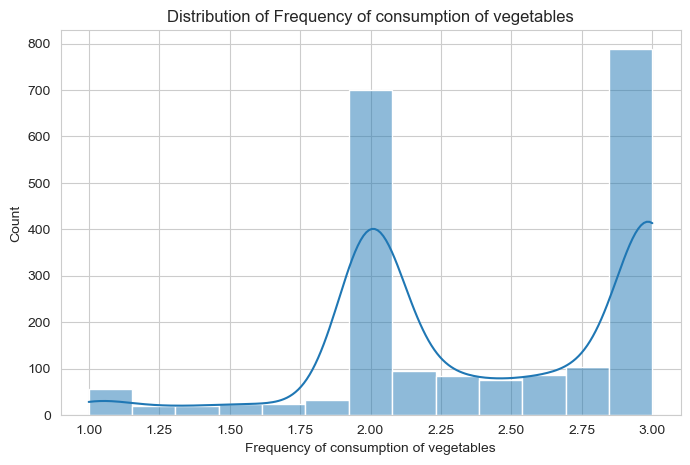

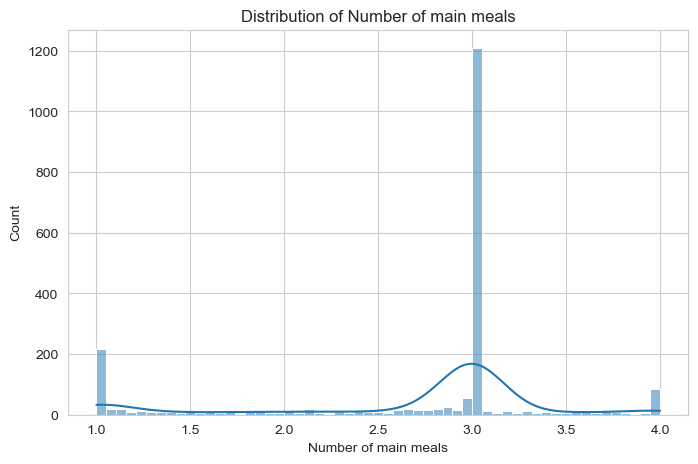

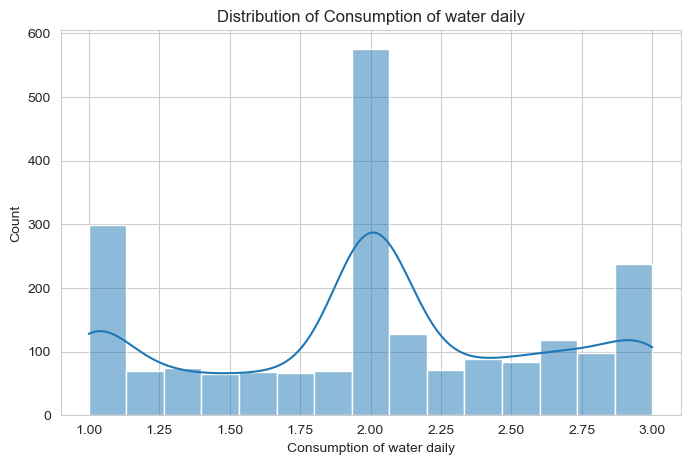

In [196]:
# Visualize the distribution of each variable to check for skewness and outliers
sns.set_style('whitegrid')
for col in numerical_df.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(numerical_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()



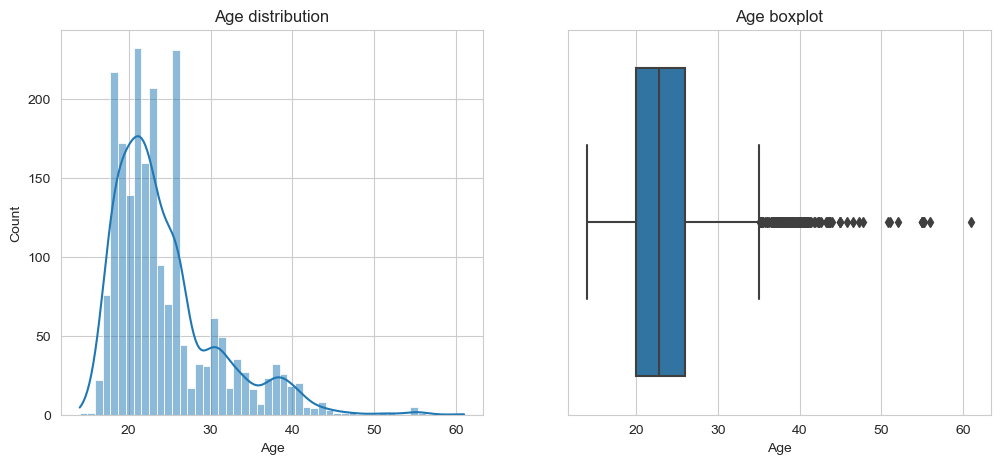

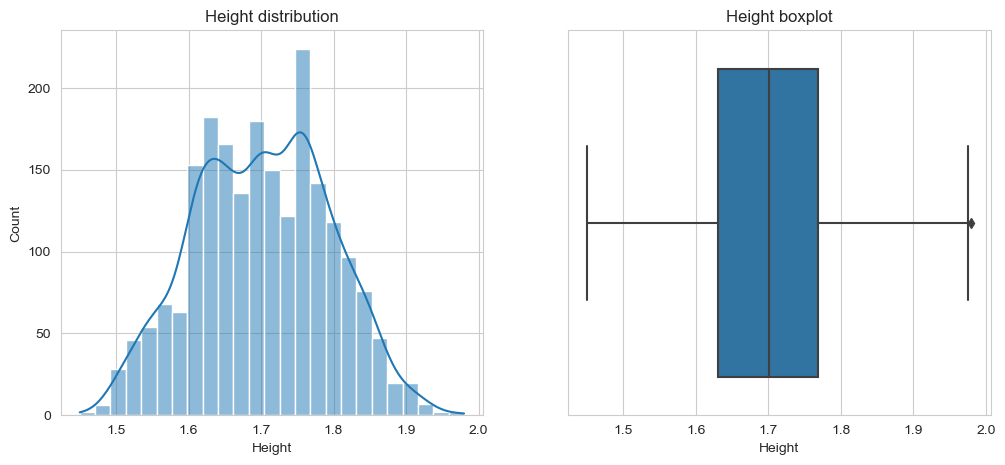

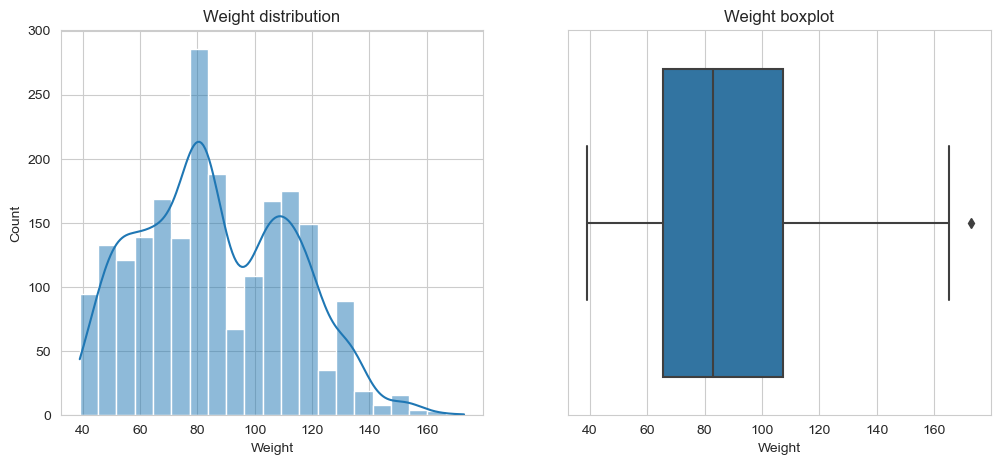

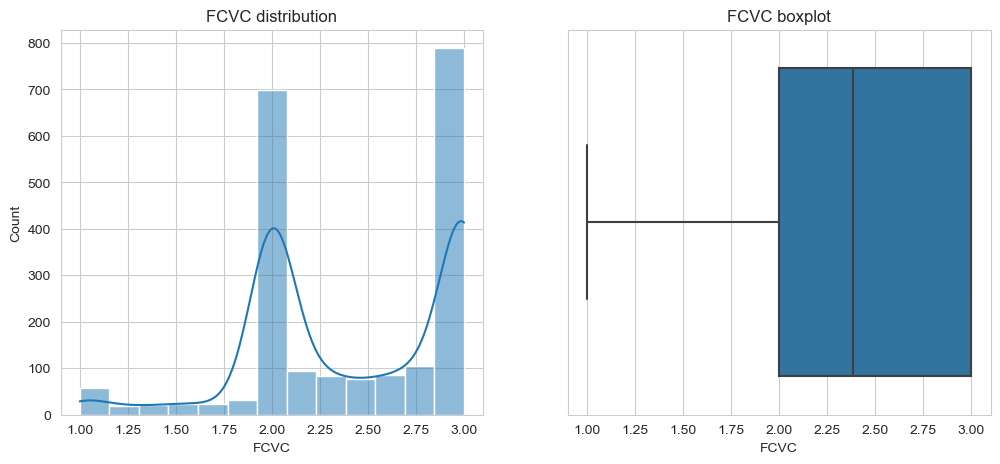

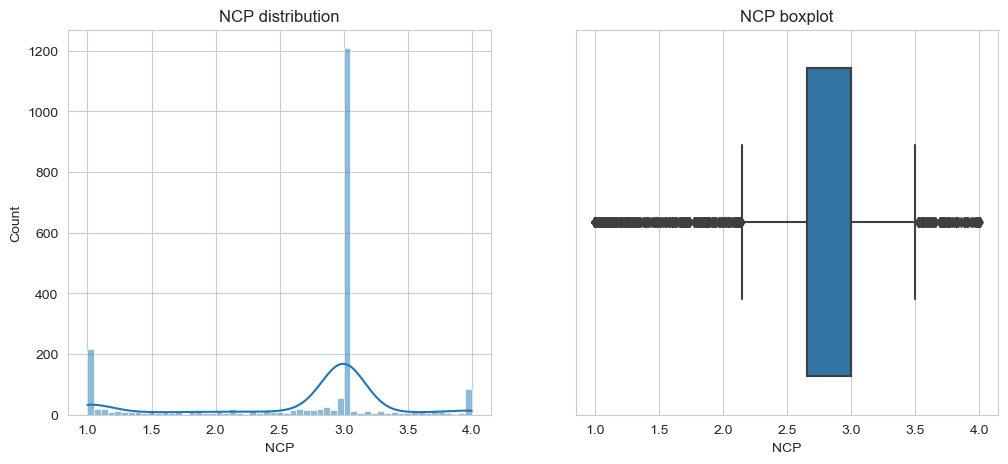

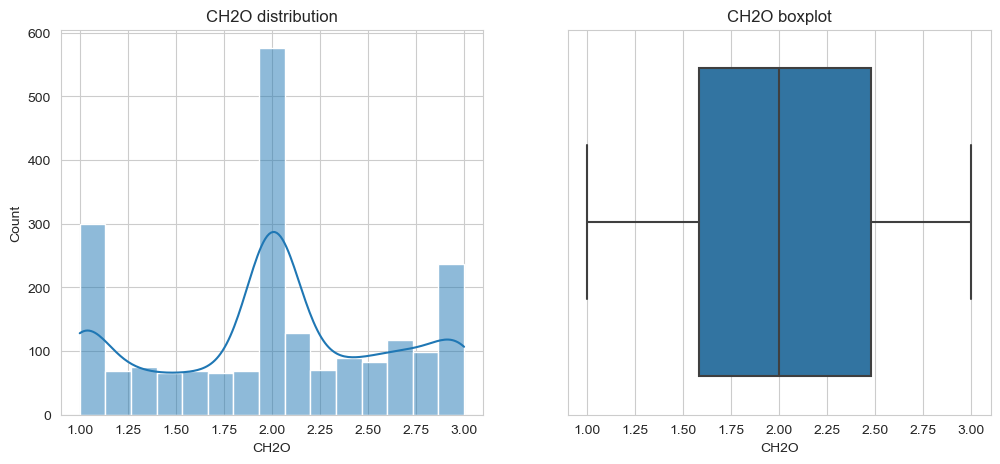

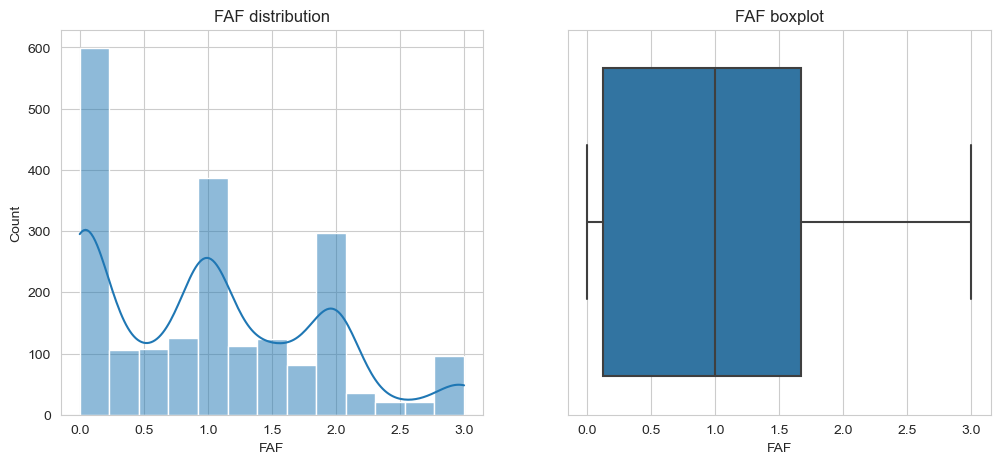

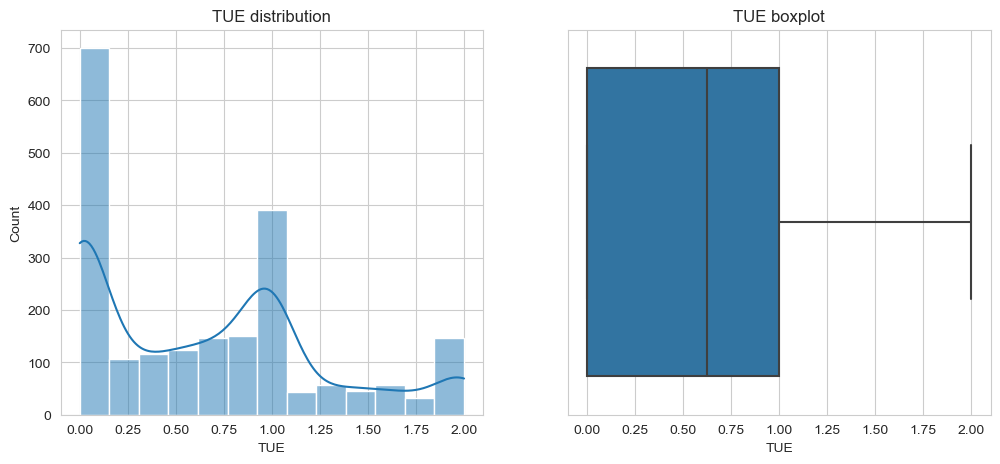

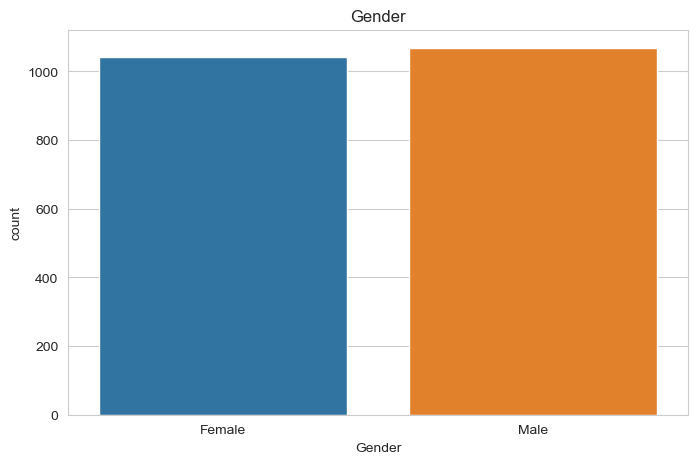

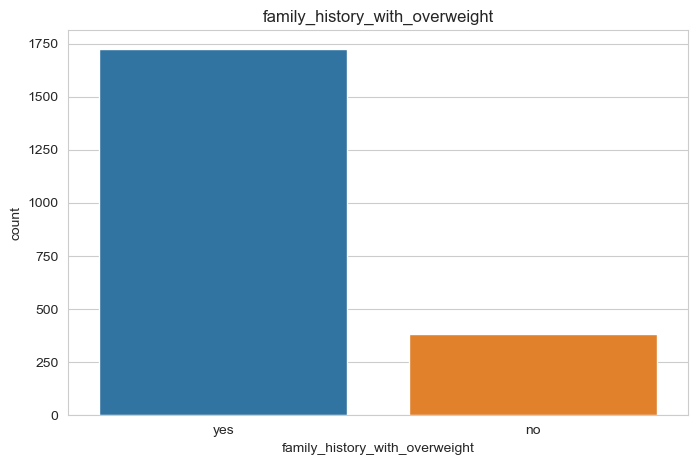

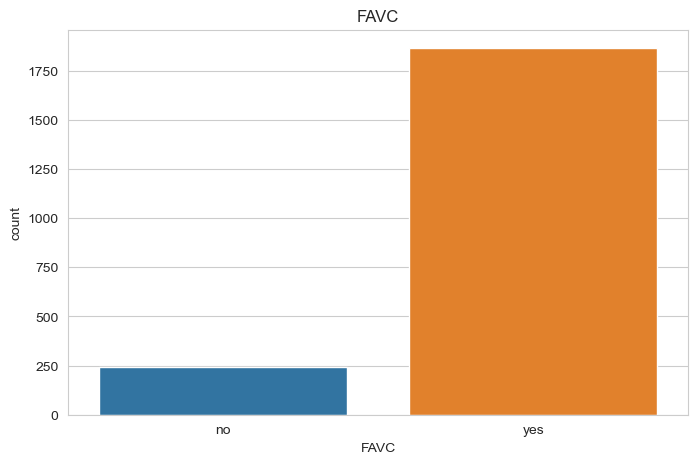

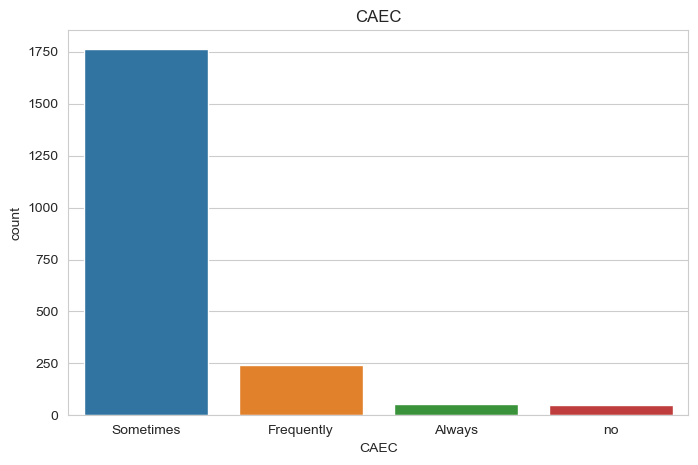

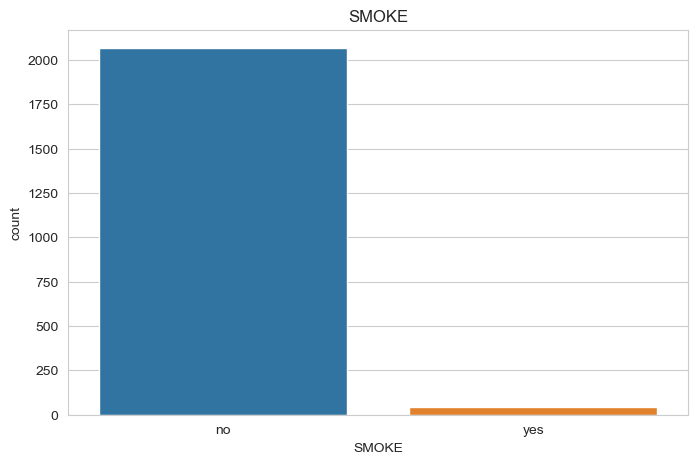

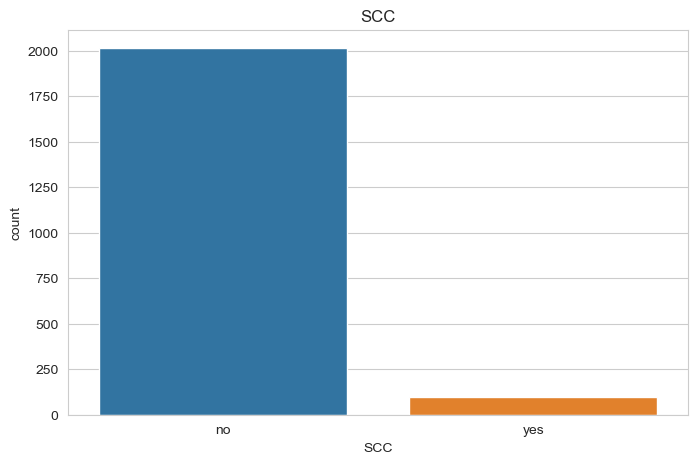

In [197]:
# Visualizing the distribution of each variable using histograms and box plots
numerical_vars = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
categorical_vars = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC']

# Histogram and box plot for numerical variables
for var in numerical_vars:
    fig, ax = plt.subplots(ncols=2, figsize=(12, 5))
    sns.histplot(df[var], ax=ax[0], kde=True)
    ax[0].set_title(var + " distribution")
    sns.boxplot(x=df[var], ax=ax[1])
    ax[1].set_title(var + " boxplot")
    plt.show()

# Bar plot for categorical variables
for var in categorical_vars:
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.countplot(x=df[var], ax=ax)
    ax.set_title(var)
    plt.show()

# Step 6: Compute descriptive statistics such as mean, median, standard deviation, and correlation coefficients to quantify the relationship between variables

In [198]:
# Compute descriptive statistics to quantify the relationship between variables
print(numerical_df.describe())
print(numerical_df.corr())

       Frequency of consumption of vegetables  Number of main meals  \
count                             2111.000000           2111.000000   
mean                                 2.419043              2.685628   
std                                  0.533927              0.778039   
min                                  1.000000              1.000000   
25%                                  2.000000              2.658738   
50%                                  2.385502              3.000000   
75%                                  3.000000              3.000000   
max                                  3.000000              4.000000   

       Consumption of water daily  
count                 2111.000000  
mean                     2.008011  
std                      0.612953  
min                      1.000000  
25%                      1.584812  
50%                      2.000000  
75%                      2.477420  
max                      3.000000  
                                    

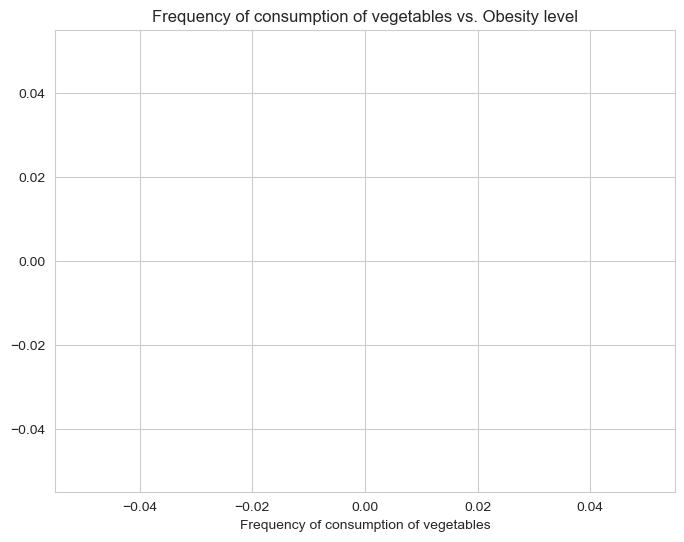

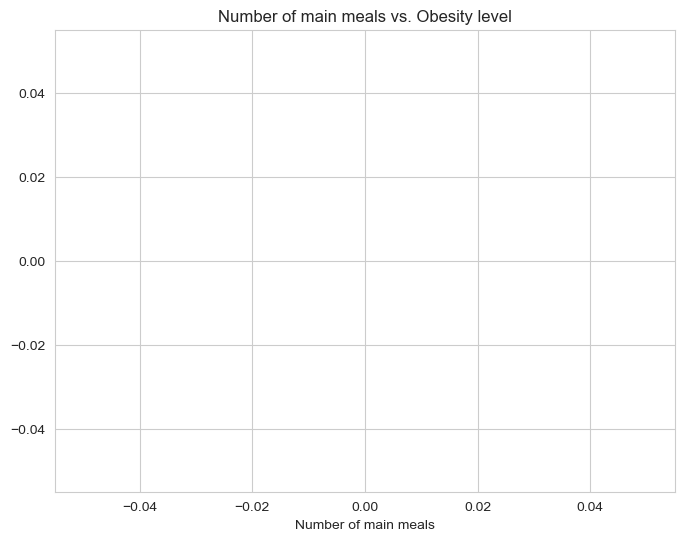

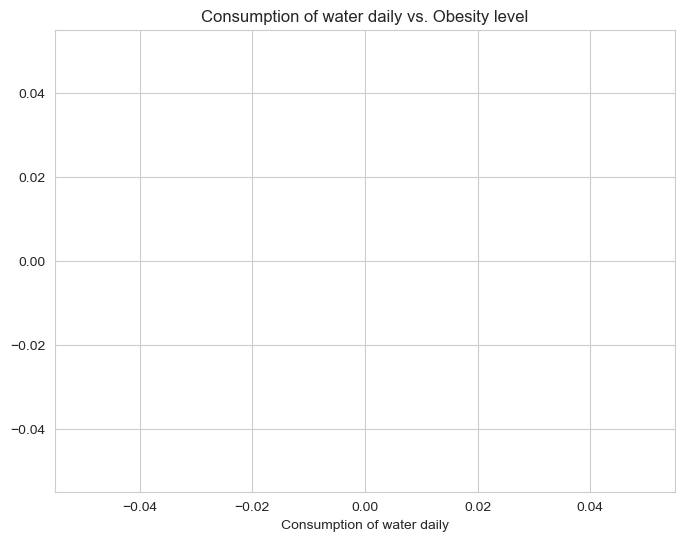

In [209]:
# Load the data frames
numerical_df = pd.read_csv('numerical_data.csv')
categorical_df = pd.read_csv('categorical_data.csv')

# Combine the data frames
df = pd.concat([numerical_df, categorical_df], axis=1)

# Plot scatter plots of each numerical variable against the obesity level
for col in numerical_df.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=col, y='Obesity level', data=df)
    plt.title(f'{col} vs. Obesity level')
    plt.show()

# Calculate correlation coefficients between each numerical variable and the obesity level
corr_df = df

# Step 7: Exploring the distribution and identifying outliers 


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


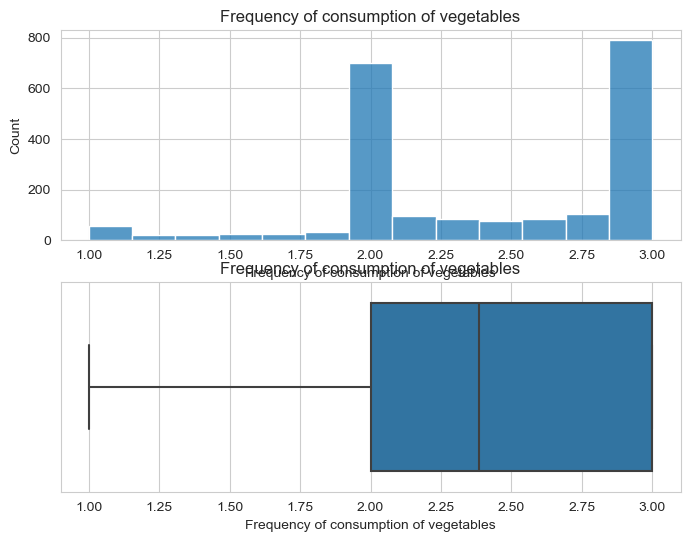

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


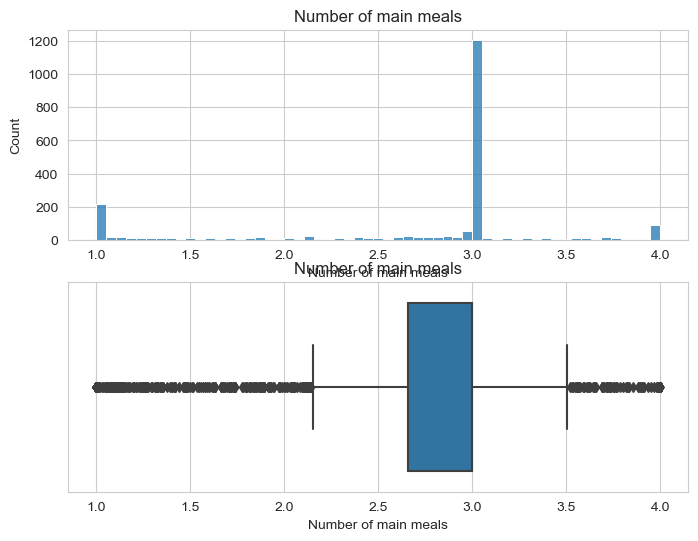

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


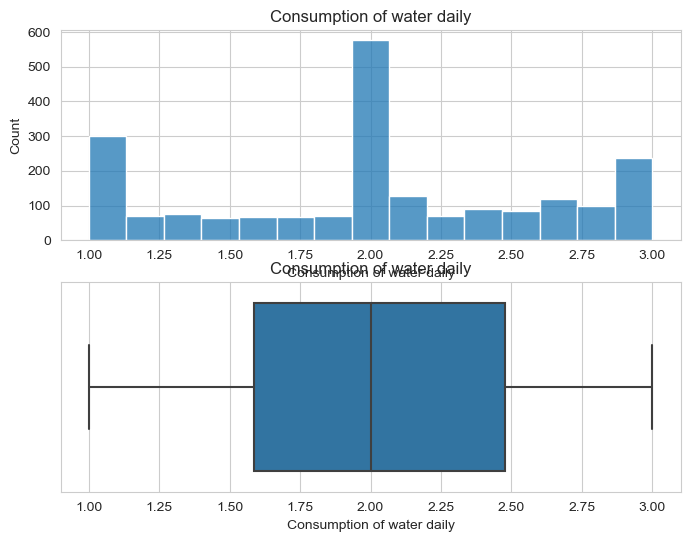

In [200]:
# Plot histograms and box plots of each numerical variable
for col in numerical_df.columns:
    plt.figure(figsize=(8, 6))
    plt.subplot(2, 1, 1)
    sns.histplot(numerical_df[col], kde=False)
    plt.title(col)
    plt.subplot(2, 1, 2)
    sns.boxplot(numerical_df[col])
    plt.title(col)
    plt.show()

# Step 8: Exploring the relationship between variables

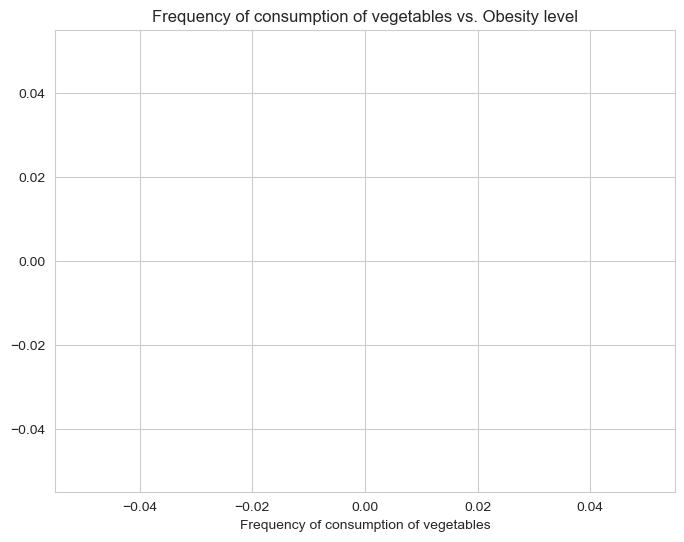

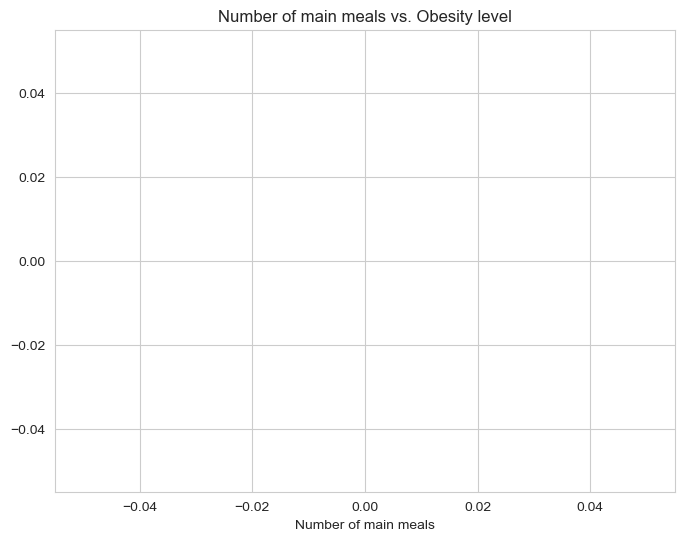

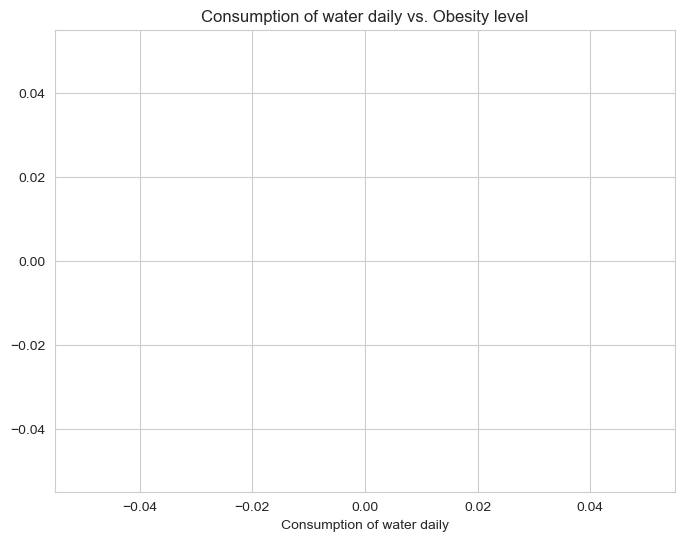

In [211]:
# Load the data frames
numerical_df = pd.read_csv('numerical_data.csv')
categorical_df = pd.read_csv('categorical_data.csv')

# Combine the data frames
df = pd.concat([numerical_df, categorical_df], axis=1)

# Plot scatter plots of each numerical variable against the obesity level
for col in numerical_df.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=col, y='Obesity level', data=df)
    plt.title(f'{col} vs. Obesity level')
    plt.show()

# Calculate correlation coefficients between each numerical variable and the obesity level
corr_df = df